In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("ola_driver_dataset.csv" , index_col = 0)
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [7]:
df['City'].unique()

array(['C23', 'C7', 'C13', 'C9', 'C11', 'C2', 'C19', 'C26', 'C20', 'C17',
       'C29', 'C10', 'C24', 'C14', 'C6', 'C28', 'C5', 'C18', 'C27', 'C15',
       'C8', 'C25', 'C21', 'C1', 'C4', 'C3', 'C16', 'C22', 'C12'],
      dtype=object)

In [8]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [9]:
# for missing value detection 

from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=5)

ximputed = knn.fit_transform(df[['Age' , 'Gender']])


In [10]:
ximputed

array([[28.,  0.],
       [28.,  0.],
       [28.,  0.],
       ...,
       [30.,  0.],
       [30.,  0.],
       [30.,  0.]], shape=(19104, 2))

In [11]:
df[['Age' , 'Gender']] = ximputed

In [12]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19104 non-null  float64
 3   Gender                19104 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 2.0+ MB


In [14]:
df.shape

(19104, 13)

In [15]:
df.select_dtypes(include= "object")

,MMM-YY,City,Dateofjoining,LastWorkingDate
0,01/01/19,C23,24/12/18,NaN
1,02/01/19,C23,24/12/18,NaN
2,03/01/19,C23,24/12/18,03/11/19
3,11/01/20,C7,11/06/20,NaN
4,12/01/20,C7,11/06/20,NaN
...,...,...,...,...
19099,08/01/20,C27,06/08/20,NaN
19100,09/01/20,C27,06/08/20,NaN
19101,10/01/20,C27,06/08/20,NaN
19102,11/01/20,C27,06/08/20,NaN


In [16]:
df.select_dtypes(include= "number")

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,28.0,0.0,2,57387,1,1,2381060,2
1,1,28.0,0.0,2,57387,1,1,-665480,2
2,1,28.0,0.0,2,57387,1,1,0,2
3,2,31.0,0.0,2,67016,2,2,0,1
4,2,31.0,0.0,2,67016,2,2,0,1
...,...,...,...,...,...,...,...,...,...
19099,2788,30.0,0.0,2,70254,2,2,740280,3
19100,2788,30.0,0.0,2,70254,2,2,448370,3
19101,2788,30.0,0.0,2,70254,2,2,0,2
19102,2788,30.0,0.0,2,70254,2,2,200420,2


In [17]:
df.select_dtypes(include= "number").describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.657684,0.419075,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.251277,0.493297,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


# for new dataset

#### *a. Convert date-like features to their respective data type*

In [18]:
df['MMM-YY'] =  pd.to_datetime(df['MMM-YY'] ,  format='mixed')
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'] , format = "%d/%m/%y")

#### *create target column*

In [19]:
df['LastWorkingDate']
df['LastWorkingDate'] = df['LastWorkingDate'].fillna("0")
print(df['LastWorkingDate']) 

0               0
1               0
2        03/11/19
3               0
4               0
           ...   
19099           0
19100           0
19101           0
19102           0
19103           0
Name: LastWorkingDate, Length: 19104, dtype: object


In [20]:
def target(e):
    if e == "0":
        return 0
    else:
        return 1

df['churn'] = df['LastWorkingDate'].apply(target)

df['churn'].value_counts()

churn
0    17488
1     1616
Name: count, dtype: int64

In [21]:
df.drop(columns="LastWorkingDate" , inplace=True)

### c. Univariate Analysis and Bivariate Analysis of all the attributes

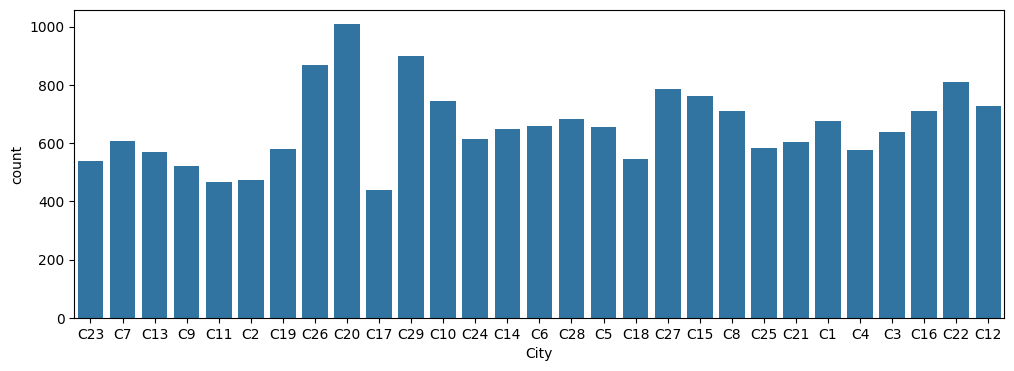

In [22]:
plt.figure(figsize=(12,4))
sns.countplot(x =df['City'])
plt.show()

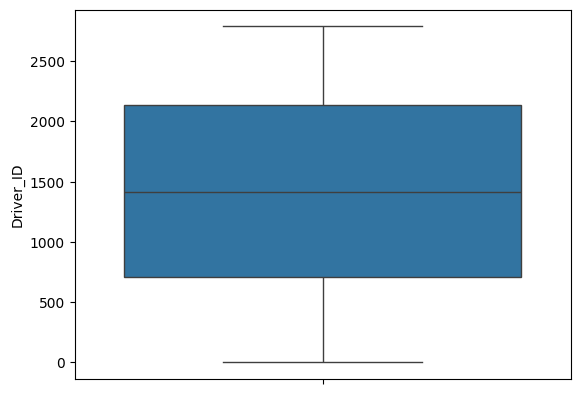

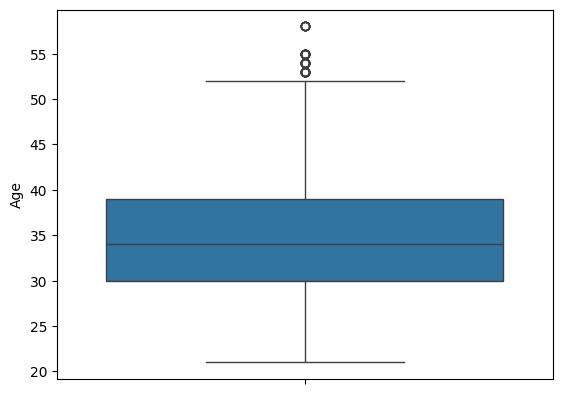

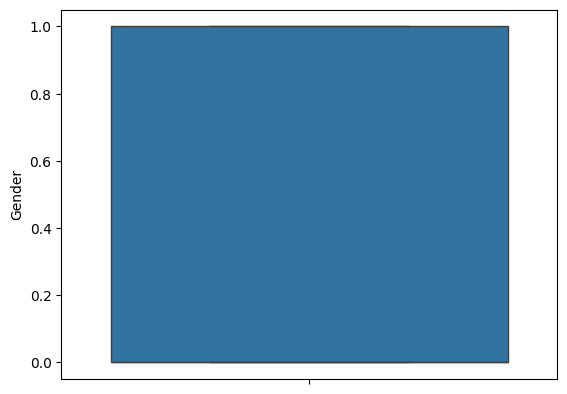

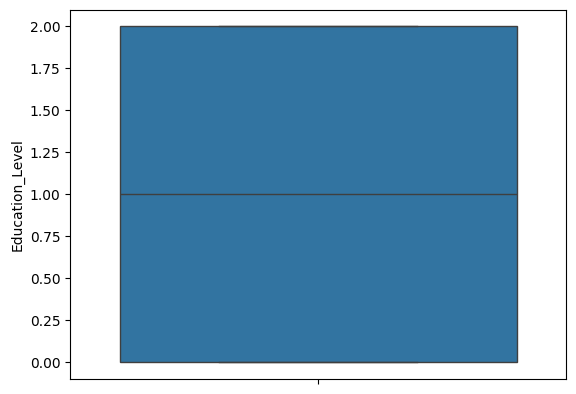

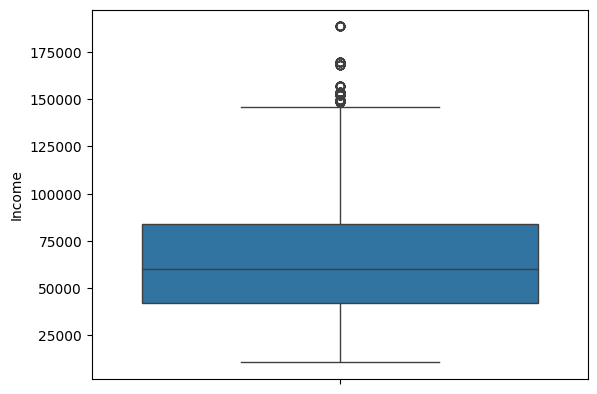

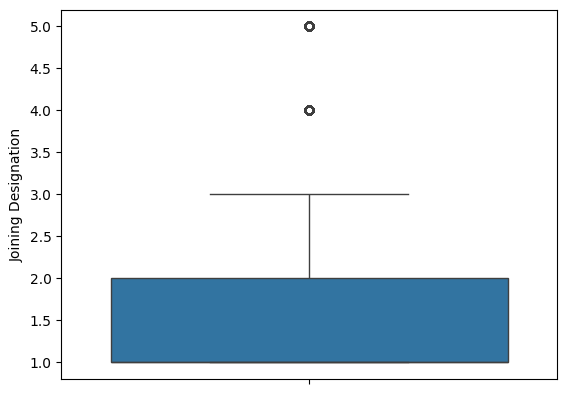

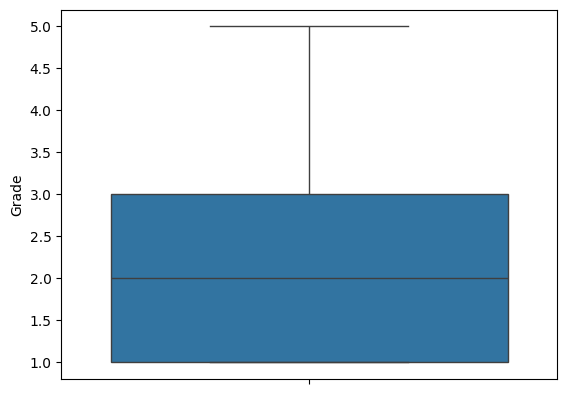

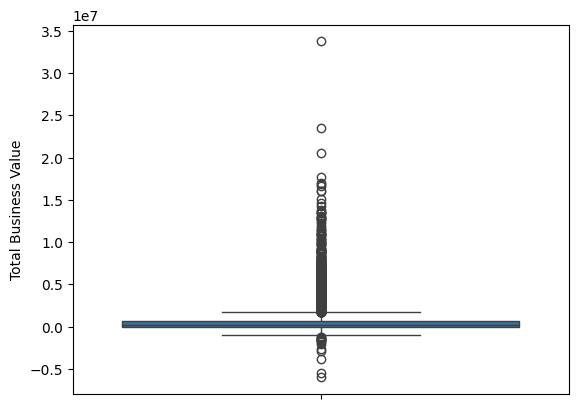

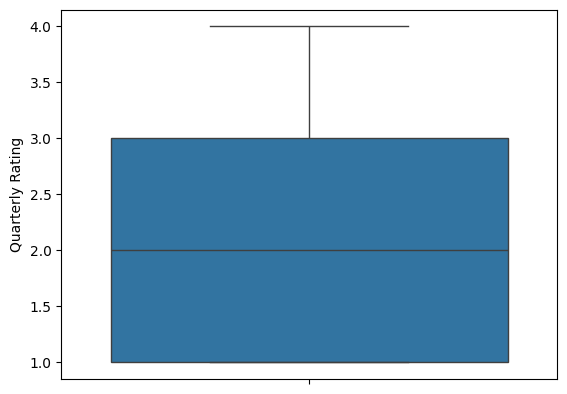

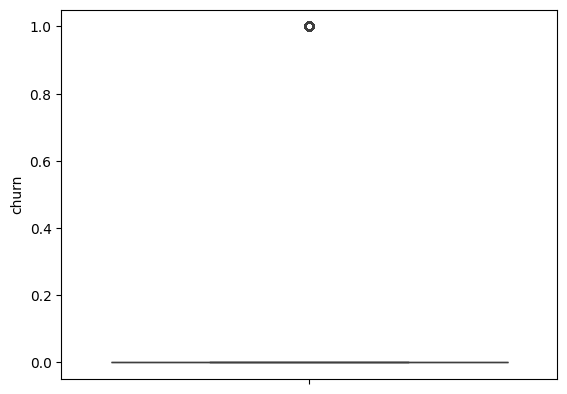

In [23]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(df[i])
    plt.show()

### c. Aggregate data in order to remove multiple occurrences of same driver data (Hint: Groupby Driver ID)

In [24]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,churn
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,1,1,2381060,2,0
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,1,1,-665480,2,0
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,1,1,0,2,1
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-06-11,2,2,0,1,0
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-06-11,2,2,0,1,0


In [25]:
new_df =  df.groupby("Driver_ID")[['MMM-YY', 'Driver_ID', 'Age', 'Gender','City' ,'Education_Level','Income', 'Dateofjoining','Joining Designation', 'Grade','churn']].max()

#### *create some columns for new dataframe *

##### *City*
##### *Quarterly rating*
##### *increased rating*
##### *total bussiness value*
##### *increased income*

In [26]:
# city 
def c(e):
    if e[0] == "C":
        s =   e[1:]
        return int(s)
    
city = df['City'].apply(c)

new_df['City'] = city

In [27]:
city.shape

(19104,)

In [28]:
# for increased rating
def f(e):
    last = e['Quarterly Rating'].iloc[-1]
    first = e['Quarterly Rating'].iloc[0]
    if first < last:
        return 1
    else:
        return 0

new =  df.groupby("Driver_ID").apply(f)

print(new.value_counts())

new_df["increase rating"] = new

0    2023
1     358
Name: count, dtype: int64


C:\Users\Acer\AppData\Local\Temp\ipykernel_12472\4220213532.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  new =  df.groupby("Driver_ID").apply(f)


In [29]:
# total business value
def total (e):
    return e['Total Business Value'].mean()

t = df.groupby("Driver_ID").apply(total)

new_df['Total Business Value'] = t

C:\Users\Acer\AppData\Local\Temp\ipykernel_12472\167342415.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  t = df.groupby("Driver_ID").apply(total)


In [30]:
#increased income
def inc(e):
    first = e['Income'].iloc[0]
    last = e['Income'].iloc[-1]
    if first < last :
        return 1
    else:
        return 0

income = df.groupby("Driver_ID").apply(inc)

new_df['income_increase'] = income

new_df['income_increase'].value_counts()

C:\Users\Acer\AppData\Local\Temp\ipykernel_12472\969391172.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  income = df.groupby("Driver_ID").apply(inc)


income_increase
0    2338
1      43
Name: count, dtype: int64

In [31]:
new_df.drop('Driver_ID' , axis= 1 , inplace= True)

In [32]:
# ctreate mew datetime column 

new_df['Reporting_year'] = new_df['MMM-YY'].dt.year
new_df['Reporting_month'] = new_df['MMM-YY'].dt.month
new_df['Reporting_day'] = new_df['MMM-YY'].dt.day

In [33]:

new_df['Dateofjoining_year'] = new_df['Dateofjoining'].dt.year
new_df['Dateofjoining_moth'] = new_df['Dateofjoining'].dt.month
new_df['Dateofjoining_day'] = new_df['Dateofjoining'].dt.day

In [34]:
new_df.drop(columns=['Dateofjoining' , 'MMM-YY'] , axis=1 , inplace= True)

In [35]:
new_df.reset_index()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,churn,increase rating,Total Business Value,income_increase,Reporting_year,Reporting_month,Reporting_day,Dateofjoining_year,Dateofjoining_moth,Dateofjoining_day
0,1,28.0,0.0,23,2,57387,1,1,1,0,571860.000000,0,2019,3,1,2018,12,24
1,2,31.0,0.0,23,2,67016,2,2,0,0,0.000000,0,2020,12,1,2020,6,11
2,4,43.0,0.0,7,2,65603,2,2,1,0,70000.000000,0,2020,4,1,2019,7,12
3,5,29.0,0.0,13,0,46368,1,1,1,0,40120.000000,0,2019,3,1,2019,9,1
4,6,31.0,1.0,13,1,78728,3,3,0,1,253000.000000,0,2020,12,1,2020,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,27,0,82815,2,3,0,1,906200.833333,0,2020,12,1,2015,10,15
2377,2785,34.0,1.0,27,0,12105,1,1,1,0,0.000000,0,2020,10,1,2020,8,28
2378,2786,45.0,0.0,27,0,35370,2,2,1,0,312787.777778,0,2019,9,1,2018,7,31
2379,2787,28.0,1.0,27,2,69498,1,1,1,0,162971.666667,0,2019,6,1,2018,7,21


In [36]:
new_df =  new_df.rename(columns={"Joining Designation":"J_ds" , "increase rating":"inc_rating","Total Business Value":"t_b_v" } )

In [37]:
new_df

,Age,Gender,City,Education_Level,Income,J_ds,Grade,churn,inc_rating,t_b_v,income_increase,Reporting_year,Reporting_month,Reporting_day,Dateofjoining_year,Dateofjoining_moth,Dateofjoining_day
Driver_ID,,,,,,,,,,,,,,,,,
1,28.0,0.0,23,2,57387,1,1,1,0,571860.000000,0,2019,3,1,2018,12,24
2,31.0,0.0,23,2,67016,2,2,0,0,0.000000,0,2020,12,1,2020,6,11
4,43.0,0.0,7,2,65603,2,2,1,0,70000.000000,0,2020,4,1,2019,7,12
5,29.0,0.0,13,0,46368,1,1,1,0,40120.000000,0,2019,3,1,2019,9,1
6,31.0,1.0,13,1,78728,3,3,0,1,253000.000000,0,2020,12,1,2020,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,34.0,0.0,27,0,82815,2,3,0,1,906200.833333,0,2020,12,1,2015,10,15
2785,34.0,1.0,27,0,12105,1,1,1,0,0.000000,0,2020,10,1,2020,8,28
2786,45.0,0.0,27,0,35370,2,2,1,0,312787.777778,0,2019,9,1,2018,7,31


In [38]:
new_df['income_increase'].value_counts()

income_increase
0    2338
1      43
Name: count, dtype: int64

# EDA (exploratory data analysis) for new_df

In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2381 entries, 1 to 2788
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 2381 non-null   float64
 1   Gender              2381 non-null   float64
 2   City                2381 non-null   int64  
 3   Education_Level     2381 non-null   int64  
 4   Income              2381 non-null   int64  
 5   J_ds                2381 non-null   int64  
 6   Grade               2381 non-null   int64  
 7   churn               2381 non-null   int64  
 8   inc_rating          2381 non-null   int64  
 9   t_b_v               2381 non-null   float64
 10  income_increase     2381 non-null   int64  
 11  Reporting_year      2381 non-null   int32  
 12  Reporting_month     2381 non-null   int32  
 13  Reporting_day       2381 non-null   int32  
 14  Dateofjoining_year  2381 non-null   int32  
 15  Dateofjoining_moth  2381 non-null   int32  
 16  Dateofjoini

In [40]:
new_df.shape

(2381, 17)

### e. Statistical summary of the derived dataset


In [41]:
new_df.describe()

,Age,Gender,City,Education_Level,Income,J_ds,Grade,churn,inc_rating,t_b_v,income_increase,Reporting_year,Reporting_month,Reporting_day,Dateofjoining_year,Dateofjoining_moth,Dateofjoining_day
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.0,2381.000000,2381.000000,2381.000000
mean,33.742293,0.416548,16.105418,1.00756,59336.159597,1.820244,2.097018,0.678706,0.150357,3.120854e+05,0.018060,2019.651407,8.166737,1.0,2018.536329,6.958001,16.186896
std,5.917797,0.492544,8.446434,0.81629,28383.012146,0.841433,0.941702,0.467071,0.357496,4.495705e+05,0.133195,0.476625,3.893261,0.0,1.609597,3.221762,8.959616
min,21.000000,0.000000,1.000000,0.00000,10747.000000,1.000000,1.000000,0.000000,0.000000,-1.979329e+05,0.000000,2019.000000,1.000000,1.0,2013.000000,1.000000,1.000000
25%,30.000000,0.000000,9.000000,0.00000,39104.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2019.000000,5.000000,1.0,2018.000000,5.000000,9.000000
50%,33.000000,0.000000,17.000000,1.00000,55315.000000,2.000000,2.000000,1.000000,0.000000,1.506244e+05,0.000000,2020.000000,9.000000,1.0,2019.000000,7.000000,15.000000
75%,37.000000,1.000000,23.000000,2.00000,75986.000000,2.000000,3.000000,1.000000,0.000000,4.294988e+05,0.000000,2020.000000,12.000000,1.0,2020.000000,10.000000,24.000000
max,58.000000,1.000000,29.000000,2.00000,188418.000000,5.000000,5.000000,1.000000,1.000000,3.972128e+06,1.000000,2020.000000,12.000000,1.0,2020.000000,12.000000,31.000000


### f. Check correlation among independent variables and how they interact with each other

In [42]:
new_df.corr()

,Age,Gender,City,Education_Level,Income,J_ds,Grade,churn,inc_rating,t_b_v,income_increase,Reporting_year,Reporting_month,Reporting_day,Dateofjoining_year,Dateofjoining_moth,Dateofjoining_day
Age,1.000000,0.027768,-0.000591,-0.007755,0.206622,0.076221,0.248576,-0.078613,0.046525,0.242520,0.112092,-0.018724,0.054767,NaN,-0.298397,0.013250,0.004773
Gender,0.027768,1.000000,0.024284,-0.009299,0.006818,-0.048782,-0.005818,0.010336,0.028816,0.009398,0.026185,-0.010856,-0.012789,NaN,-0.027417,0.007852,-0.023342
City,-0.000591,0.024284,1.000000,0.010732,0.006041,-0.026951,-0.021835,0.005713,0.001567,0.021447,0.002042,-0.018422,-0.000892,NaN,-0.010372,-0.005488,-0.008139
Education_Level,-0.007755,-0.009299,0.010732,1.000000,0.140278,0.003203,-0.016806,-0.007953,0.020580,0.008085,-0.024443,0.018656,0.029879,NaN,0.007786,-0.018093,-0.018635
Income,0.206622,0.006818,0.006041,0.140278,1.000000,0.480549,0.741213,-0.202043,0.108284,0.388771,0.090529,0.161870,0.230809,NaN,-0.219367,-0.045645,0.003717
J_ds,0.076221,-0.048782,-0.026951,0.003203,0.480549,1.000000,0.712419,-0.127773,0.068936,-0.078550,-0.083492,0.219804,0.178840,NaN,0.310402,-0.040759,-0.032660
Grade,0.248576,-0.005818,-0.021835,-0.016806,0.741213,0.712419,1.000000,-0.226190,0.105172,0.371560,0.146817,0.214864,0.270633,NaN,-0.198722,-0.059453,0.011097
churn,-0.078613,0.010336,0.005713,-0.007953,-0.202043,-0.127773,-0.226190,1.000000,-0.405072,-0.329640,-0.176845,-0.493882,-0.638755,NaN,-0.078640,-0.070958,-0.063257
inc_rating,0.046525,0.028816,0.001567,0.020580,0.108284,0.068936,0.105172,-0.405072,1.000000,0.278989,0.066485,0.231292,0.330655,NaN,0.027013,-0.029901,0.037529
t_b_v,0.242520,0.009398,0.021447,0.008085,0.388771,-0.078550,0.371560,-0.329640,0.278989,1.000000,0.353641,0.177174,0.275583,NaN,-0.445397,-0.051973,0.028642


# data preprocession 

In [43]:
x = new_df.drop("churn" , axis= 1)
y = new_df['churn']

In [44]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x,y, test_size=0.2 , random_state=42)

In [45]:
print(f"training dataset :-  {xtrain.shape} | {ytrain.shape}")
print(f"training dataset :-  {xtest.shape} | {ytest.shape}")

training dataset :-  (1904, 16) | (1904,)
training dataset :-  (477, 16) | (477,)


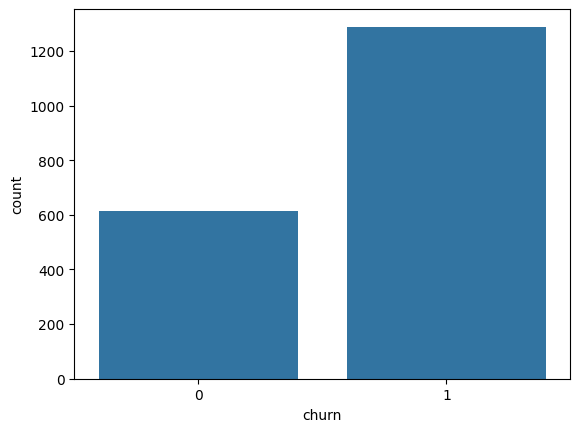

In [46]:
sns.countplot(x = ytrain)
plt.show()

In [47]:
ytrain.value_counts()

churn
1    1289
0     615
Name: count, dtype: int64

In [48]:
# missing value detection and handling
# encoding

In [49]:
new_df.isna().sum()

Age                   0
Gender                0
City                  0
Education_Level       0
Income                0
J_ds                  0
Grade                 0
churn                 0
inc_rating            0
t_b_v                 0
income_increase       0
Reporting_year        0
Reporting_month       0
Reporting_day         0
Dateofjoining_year    0
Dateofjoining_moth    0
Dateofjoining_day     0
dtype: int64

In [50]:
# class imbalance treatment

In [51]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
xsmt , ysmt = smt.fit_resample(xtrain , ytrain)

In [52]:
ysmt.value_counts()

churn
0    1289
1    1289
Name: count, dtype: int64

# start begging(random forest)
### normal forest
### hyper parameter tuning
### kfold cross vlaidation

In [53]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(max_depth= 7 , n_estimators=100)

In [54]:
random.fit(xsmt , ysmt)

RandomForestClassifier(max_depth=7)

In [55]:
print(f'training score :- {round(random.score(xsmt , ysmt) , 2)*100}')
print(f'test score :- {round(random.score(xtest , ytest) , 2)*100}')

training score :- 97.0
test score :- 96.0


In [56]:
# hyper parameter tuning :- grid seaarch cv , ranmization

param = {
        'n_estimators' : [100,150,200,250,300],
        'max_depth' : [4,5,6,10,15],
        'criterion' : ['gini', 'entropy'],
        'bootstrap' : [True, False],
}

In [57]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV (
    estimator= RandomForestClassifier(),
    param_grid= param,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose= 10
)

In [58]:
grid.fit(xsmt , ysmt)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 10, 15],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='accuracy', verbose=10)

In [59]:
print(f"best parameter :- {grid.best_params_}")
print(f"best score :- {grid.best_score_}")

best parameter :- {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 300}
best score :- 0.9635403025513659


In [60]:
# again train the model
random = RandomForestClassifier(max_depth= 8 , n_estimators=300 , criterion="gini" , bootstrap=False)
random.fit(xsmt , ysmt)

print(f'training score :- {round(random.score(xsmt , ysmt) , 2)*100}')
print(f'test score :- {round(random.score(xtest , ytest) , 2)*100}')

training score :- 97.0
test score :- 96.0


In [61]:
# kfolds cross vallidation
from sklearn.model_selection import KFold , cross_validate

random2 = RandomForestClassifier(random_state=7, bootstrap=True, criterion='gini',max_depth=10, max_features=6, n_estimators=200)

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(random2, xsmt, ysmt, cv=kfold, scoring='accuracy', return_train_score=True)

In [62]:
cv_acc_results

{'fit_time': array([1.69212103, 2.78031349, 2.52787423, 1.80515885, 4.45993876,
        6.05972648, 2.75994778, 2.51441789, 1.7799418 , 1.60108066]),
 'score_time': array([0.03183055, 0.0506084 , 0.05044246, 0.0347085 , 0.233706  ,
        0.11414361, 0.1166997 , 0.11466002, 0.03751254, 0.03262353]),
 'test_score': array([0.9496124 , 0.95348837, 0.94573643, 0.98449612, 0.93410853,
        0.96511628, 0.96124031, 0.98449612, 0.94941634, 0.98054475]),
 'train_score': array([0.98793103, 0.98663793, 0.9875    , 0.98534483, 0.98836207,
        0.98275862, 0.98663793, 0.98491379, 0.98362775, 0.98492029])}

In [63]:
print(f"train score :- {cv_acc_results['train_score'].mean()*100}")
print(f"test score :- {cv_acc_results['test_score'].mean()*100}")

train score :- 98.58634246534639
test score :- 96.08255663137572


In [64]:
ypred = random.predict(xtest)

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import classification_report

In [66]:
print(classification_report(ytest , ypred)) 

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       150
           1       0.98      0.96      0.97       327

    accuracy                           0.96       477
   macro avg       0.95      0.95      0.95       477
weighted avg       0.96      0.96      0.96       477



In [67]:
probability = random.predict_proba(xtest)

first_col = probability[:, 1]

In [68]:
fpr , tpr , thr = roc_curve(ytest , first_col)

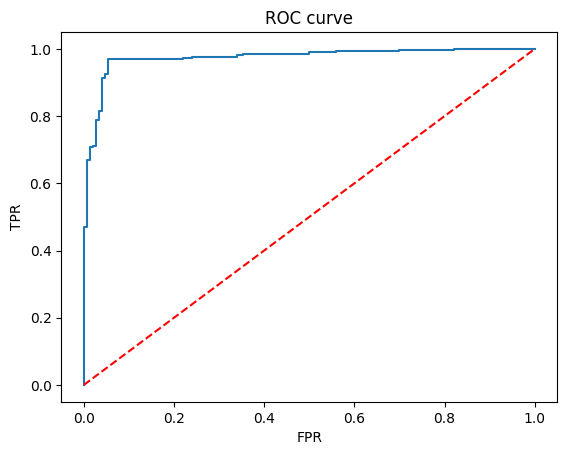

In [69]:
plt.plot(fpr,tpr)
plt.plot(fpr, fpr,'--', color='red')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# boosting 
### *normal model train*
### *hyper parameter tuning*
### *k folds cross validation*

#  Gradient Boosted Decision Trees

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
# simple model
model1 = GradientBoostingClassifier(max_depth=5 , n_estimators= 100 , learning_rate= 0.1 ,max_features=4 )

model1.fit(xsmt , ysmt)
print(f"trainign score :- {round(model1.score(xsmt , ysmt) , 2)*100}")
print(f"test score :- {round(model1.score(xtest , ytest) , 2)*100}")

trainign score :- 99.0
test score :- 96.0


In [72]:
# using hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

params = {
    "n_estimators":[100,150,200,300,350],
    "max_depth":[5,6,7,8,9],
    "learning_rate":[0.1,0.2,0.3,0.4,0.5],
    "max_features":[4,5,6,7,8,10]
}

model2 = GradientBoostingClassifier()

rrm = RandomizedSearchCV(model2 , params , scoring= "accuracy",cv = 3, n_jobs=-1 , verbose=1 )
rrm.fit(xsmt , ysmt)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'max_depth': [5, 6, 7, 8, 9],
                                        'max_features': [4, 5, 6, 7, 8, 10],
                                        'n_estimators': [100, 150, 200, 300,
                                                         350]},
                   scoring='accuracy', verbose=1)

In [73]:
print("best parameters :- ",rrm.best_estimator_)
print("best score :- ",rrm.best_score_)

best parameters :-  GradientBoostingClassifier(learning_rate=0.2, max_depth=8, max_features=5)
best score :-  0.9631516726678759


In [74]:
# again model traing with best parameter (my paramerters)

model3 = GradientBoostingClassifier(max_depth= 5, learning_rate=0.1 , n_estimators=100 , max_features=5)
model3.fit(xsmt , ysmt)

print(f"traingn score :- {round(model3.score(xsmt , ysmt),2)*100}")
print(f"test score :- {round(model3.score(xtest , ytest),2)*100}")

traingn score :- 99.0
test score :- 95.0


In [75]:
# using kfolds cross validation
model4 = GradientBoostingClassifier(max_depth= 5, learning_rate=0.1 , n_estimators=100 , max_features=5)

kfold2 = KFold(n_splits=10)

cv_acc_results2 = cross_validate(model4 , xsmt , ysmt , cv=kfold2 , scoring="accuracy",return_train_score=True)

cv_acc_results2

{'fit_time': array([0.85552883, 0.83631206, 1.11209035, 0.9045012 , 0.78739738,
        0.82241821, 0.82759976, 0.77740383, 0.79850483, 0.79973936]),
 'score_time': array([0.        , 0.00400019, 0.00699782, 0.00530195, 0.        ,
        0.        , 0.004987  , 0.        , 0.        , 0.00499821]),
 'test_score': array([0.9496124 , 0.94573643, 0.9496124 , 0.98449612, 0.93023256,
        0.96511628, 0.96511628, 0.97674419, 0.95330739, 0.98054475]),
 'train_score': array([0.99698276, 0.99525862, 0.99525862, 0.99439655, 0.99525862,
        0.99396552, 0.99525862, 0.99224138, 0.99353727, 0.99224472])}

In [76]:
print(cv_acc_results2['train_score'].mean()*100)
print(cv_acc_results2['test_score'].mean()*100)

99.444026801765
96.00518806744486


In [77]:
# classification report

ypred_begging = model3.predict(xtest)
print(classification_report(ytest , ypred_begging))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       150
           1       0.97      0.96      0.97       327

    accuracy                           0.95       477
   macro avg       0.94      0.95      0.95       477
weighted avg       0.95      0.95      0.95       477



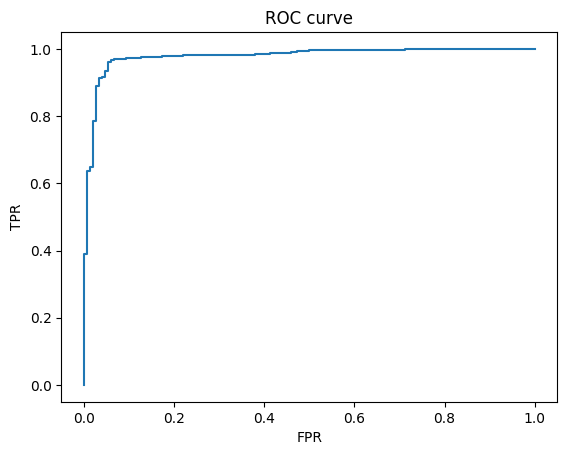

In [78]:
ypred_begging_auc = model3.predict_proba(xtest)

first = ypred_begging_auc[:,1]

fpr2 , tpr2 , thr2 = roc_curve(ytest , first)

plt.plot(fpr2,tpr2)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# xgboots
### *simple model*
### *classification report*
### *auc roc curve*

In [79]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth= 5, learning_rate=0.1 , n_estimators=100 , max_features=5)
xgb.fit(xsmt , ysmt)

c:\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:23:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "max_features" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_features=5, max_leaves=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=100, n_jobs=None, ...)

In [80]:
print("trainig score :- " , xgb.score(xsmt , ysmt))
print("test score :- " , xgb.score(xtest , ytest))

trainig score :-  0.9806051202482544
test score :-  0.9580712788259959


In [81]:
# hyper parameter tuning :- grid seaarch cv , ranmization

param2 = {
        'n_estimators' : [100,150,200,250,300],
        'max_depth' : [4,5,6,10,15],
        'bootstrap' : [True, False],
}

grid_xgboost = GridSearchCV (
    estimator= RandomForestClassifier(),
    param_grid= param2,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose= 10
)

grid_xgboost.fit(xsmt , ysmt)

print(f"best parameter :- {grid_xgboost.best_params_}")
print(f"best score :- {grid_xgboost.best_score_}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


best parameter :- {'bootstrap': False, 'max_depth': 15, 'n_estimators': 300}
best score :- 0.9635395499360276


In [82]:
ypred_xg = xgb.predict(xtest)
print(classification_report(ytest , ypred_xg))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       150
           1       0.98      0.96      0.97       327

    accuracy                           0.96       477
   macro avg       0.95      0.95      0.95       477
weighted avg       0.96      0.96      0.96       477



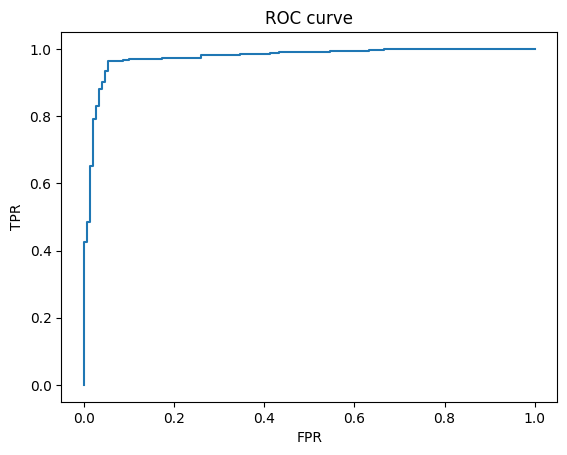

In [83]:
ypred_xgb_auc = xgb.predict_proba(xtest)

first2 = ypred_xgb_auc[:,1]

fpr3 , tpr3 , thr3 = roc_curve(ytest , first2)

plt.plot(fpr3,tpr3)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Stacking
### *simople model*
### *hyper parameter tuning*
### *kfold cross validation*
### *classification report*
### *auc roc curve*

In [84]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

r = [
    ("knn" , KNeighborsClassifier(n_neighbors=5 , weights="distance" , metric= "minkowski" ,)),
    ("lr" , LogisticRegression()),
    ("dision tree" , DecisionTreeClassifier(max_depth=5 , min_samples_leaf=5 , max_features=6 , criterion="gini"))
]

st = StackingClassifier(estimators= r, cv=5 , final_estimator= KNeighborsClassifier())

st.fit(xsmt , ysmt)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

StackingClassifier(cv=5,
                   estimators=[('knn',
                                KNeighborsClassifier(weights='distance')),
                               ('lr', LogisticRegression()),
                               ('dision tree',
                                DecisionTreeClassifier(max_depth=5,
                                                       max_features=6,
                                                       min_samples_leaf=5))],
                   final_estimator=KNeighborsClassifier())

In [85]:
st.score(xsmt, ysmt)

0.9685802948021722

In [86]:
st.score(xtest, ytest)

0.9433962264150944

In [87]:
ypred_stack = st.predict(xtest)
print(classification_report(ytest , ypred_stack))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       150
           1       0.95      0.96      0.96       327

    accuracy                           0.94       477
   macro avg       0.94      0.93      0.93       477
weighted avg       0.94      0.94      0.94       477



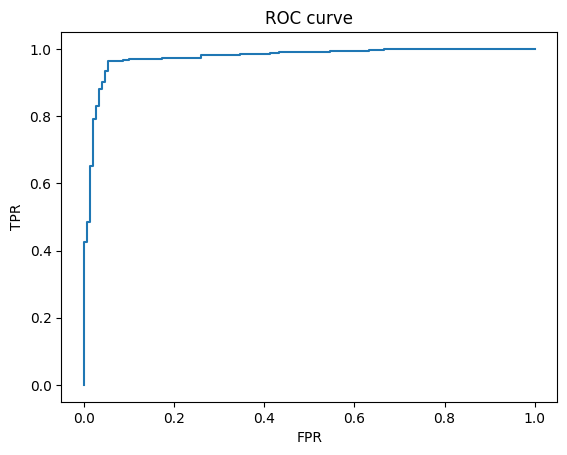

In [88]:
ypred_stack_auc = xgb.predict_proba(xtest)

first2 = ypred_stack_auc[:,1]

fpr4 , tpr4 , thr4 = roc_curve(ytest , first2)

plt.plot(fpr4,tpr4)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [89]:
new_df

,Age,Gender,City,Education_Level,Income,J_ds,Grade,churn,inc_rating,t_b_v,income_increase,Reporting_year,Reporting_month,Reporting_day,Dateofjoining_year,Dateofjoining_moth,Dateofjoining_day
Driver_ID,,,,,,,,,,,,,,,,,
1,28.0,0.0,23,2,57387,1,1,1,0,571860.000000,0,2019,3,1,2018,12,24
2,31.0,0.0,23,2,67016,2,2,0,0,0.000000,0,2020,12,1,2020,6,11
4,43.0,0.0,7,2,65603,2,2,1,0,70000.000000,0,2020,4,1,2019,7,12
5,29.0,0.0,13,0,46368,1,1,1,0,40120.000000,0,2019,3,1,2019,9,1
6,31.0,1.0,13,1,78728,3,3,0,1,253000.000000,0,2020,12,1,2020,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,34.0,0.0,27,0,82815,2,3,0,1,906200.833333,0,2020,12,1,2015,10,15
2785,34.0,1.0,27,0,12105,1,1,1,0,0.000000,0,2020,10,1,2020,8,28
2786,45.0,0.0,27,0,35370,2,2,1,0,312787.777778,0,2019,9,1,2018,7,31


In [ ]:
import joblib

joblib.dump(random , "begging.joblib")
joblib.dump(model1 , "gbdt.joblib")
joblib.dump(xgb , "xgboost.joblib")
joblib.dump(st , "stacking.joblib")


['stacking.joblib']

In [ ]:

# st.markdown('''
# <style>
# .tt{
#     font-size : 250px;
#     }     
# </style>
#  ''' , unsafe_allow_html=True)

# st.markdown("<span class ='tt'>😂</span>" , unsafe_allow_html=True)


In [ ]:
new_df["City"].unique()